In [89]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def checkBag(capacity,i,contents,components,size):
    #check if items in bag
    if((contents[i])==0):
        #check if item can be added to bag
        if((capacity+components[i][1])>size):
            #if it can't return 0
            #print('cant ',capacity,' ',components[i][1])
            return 0;
        elif((capacity+components[i][1])<=size):
            #if it can be return 1
            #print('can ',capacity,' ',components[i][1])
            return 1;

def updateBag(capacity,contents,components,size):
    #get random item
    i=random.randint(0,9)
    #check to see if item is in bag
    r=checkBag(capacity,i,contents,components,size)
    #1 means it can be added
    if(r==1):
        #add item to bag
        contents[i]=1
        capacity=capacity+components[i][1]
        temp=[contents,capacity,0]
        return temp
    #r=0 means item can't be added
    else:
        #remove item
        contents[i]=0
        capacity=capacity+components[i][1]
        temp=[contents,capacity,1]
        return temp

def calcFitness(contents,components):
    #calculate fitness of bag
    f=0
    for i in range(len(components)):
        if((contents[i])==1):
            f=f+components[i][0]
    return f
        
def evalFitness(f,bestF,bestC,contents,components,capacity):
    #see if new fitness is better than old
    if(f>bestF):
        bestC=[]
        #if new is better get new better contents
        for i in range(len(contents)):
            if(contents[i]==1):
                bestC.append(components[i][1])
        #print('new ',f,'>',bestF,' ')
        temp=[f,bestC]
        #return new fitness and new contents
        return temp
    elif(bestF>f):
        #old is better return old fitness and components
        temp=[bestF,bestC]
        #print('old ',bestF,'>',f,' ')
        return temp
    else:
        temp=[bestF,bestC]
        #print('same ',bestF,'>',f,' ')
        return temp

def getMin(components):
    #get smallest item
    mini=10000000
    for i in range(len(components)):
        if(components[i][1]<mini):
            mini=components[i][1]
    return mini;

In [90]:
def hillclimber(size,its,rate):#size of bag, no. iterations    
    #initialise variables
    z=0 #counter
    #dictionary of components
    components=[[5,3],[6,2],[1,4],[9,5],[2,8],[8,9],[4,10],[3,1],[7,6],[10,7]]
    #dictionary for graph points
    points=[]#keep track of whats in the bag
    contents=[0,0,0,0,0,0,0,0,0,0]
    capacity=0#keep track of how full bag is
    mini=getMin(components)#get smallest component
    bestF=0#keeps track of best fitness
    bestC=[]#keeps track of best components
    
    #while loop
    while (z<=its-1):
        #see if bag should mutate
        m=random.randint(0,100)
        if(m<=rate):
            #update bag based on r value
            temp=updateBag(capacity,contents,components,size)
            #update capacity and contents and see if bag can be filled
            capacity=temp[1]
            contents=temp[0]
            check=temp[2]
            #bag can still be filled
            if (check==0):
                do_nothing=0
            #bag can be filled further
            else:
                #calculate new fitness
                f=calcFitness(contents,components)
                #evaluate fitness
                temp=evalFitness(f,bestF,bestC,contents,components,capacity)
                bestF=temp[0]
                bestC=temp[1]
                #reset capacity and contents of bag
                contents=[0,0,0,0,0,0,0,0,0,0]
                capacity=0
            #add current best fitness to graph
            points.append(bestF)
            #new loop
            z=z+1
    temp=[points,bestF,bestC]
    return temp

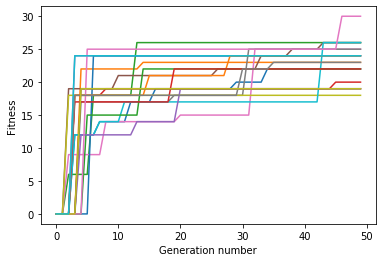

Best Fitness= 30   [3, 2, 5, 1, 6]
Worst Fitness= 18   [9, 7]


In [230]:
#Population of hill climbers
def popHC(pop,size,its,rate):
    points=[]#graph plot points for hill climbers
    for i in range(pop):
        temp=hillclimber(size,its,rate)
        points.append(temp)
    return points

def plotPopHC(pop,size,its,rate):
    points=popHC(pop,size,its,rate)
    bestF=0
    worstF=100000000000
    for i in range(pop):
        plt.plot(points[i][0])
        if(points[i][1]>bestF):
            bestF=points[i][1]
            bestC=points[i][2]
        if(points[i][1]<worstF):
            worstF=points[i][1]
            worstC=points[i][2]
    plt.ylabel('Fitness')
    plt.xlabel('Generation number')
    plt.show()
    print('Best Fitness=',bestF,' ',bestC)
    print('Worst Fitness=',worstF,' ',worstC)

#       pop,size,its,rate
plotPopHC(20,20,50,100)

#### 